In [49]:
import numpy as np
import pandas as pd
import tensorflow_probability as tfp
import seaborn as sns

from causalimpact import CausalImpact
from matplotlib import pyplot as plt

In [2]:
def build_model(observed_time_series):
    trend = tfp.sts.LocalLinearTrend(observed_time_series=observed_time_series)
    seasonal = tfp.sts.Seasonal(num_seasons=7, observed_time_series=observed_time_series)
    model = tfp.sts.Sum([seasonal, trend], observed_time_series=observed_time_series)
    return model

In [3]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20250120'
}

In [4]:
query_dau = """
SELECT toDate(time) AS day,
COUNT(DISTINCT user_id) AS dau
FROM simulator_20250120.feed_actions
GROUP BY toDate(time)
"""

# dau_df = pandahouse.read_clickhouse(query=query_dau, connection=connection)

In [5]:
dau_df = pd.read_csv("dau_df.csv", parse_dates=['day'])

In [6]:
dau_df = pd.Series(data=dau_df.dau.tolist(), index=dau_df.day).asfreq("D").astype('float32')

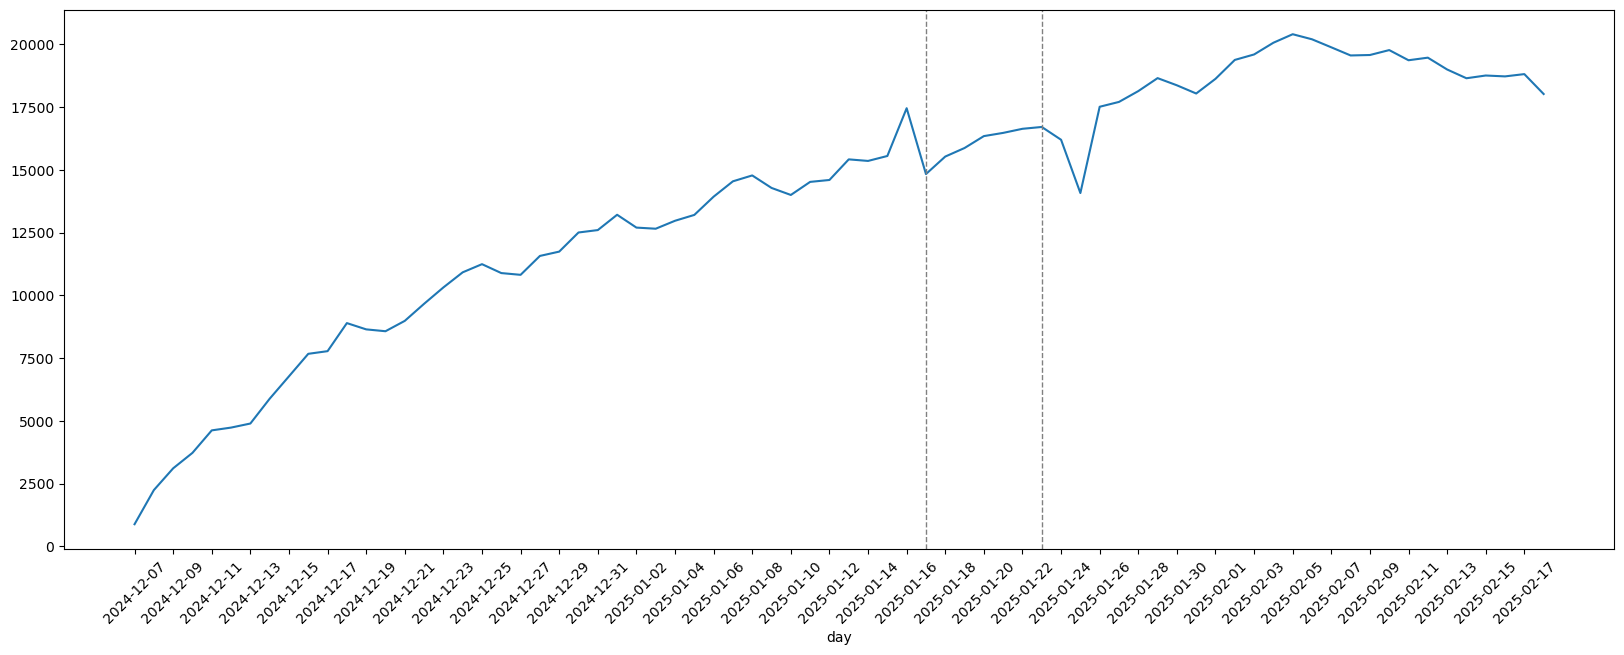

In [7]:
plt.figure(figsize=(20, 7))
data = dau_df
sns.lineplot(data)
plt.xticks(ticks=data.index[::2], rotation=45)
plt.axvline(x=pd.Timestamp('2025-01-17'), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=pd.Timestamp('2025-01-23'), color='grey', linestyle='--', linewidth=1)

In [8]:
dau_df_impact = CausalImpact(
    data=dau_df,
    pre_period=['2024-12-07', '2025-01-16'],
    post_period=['2025-01-17', '2025-01-23']
)

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


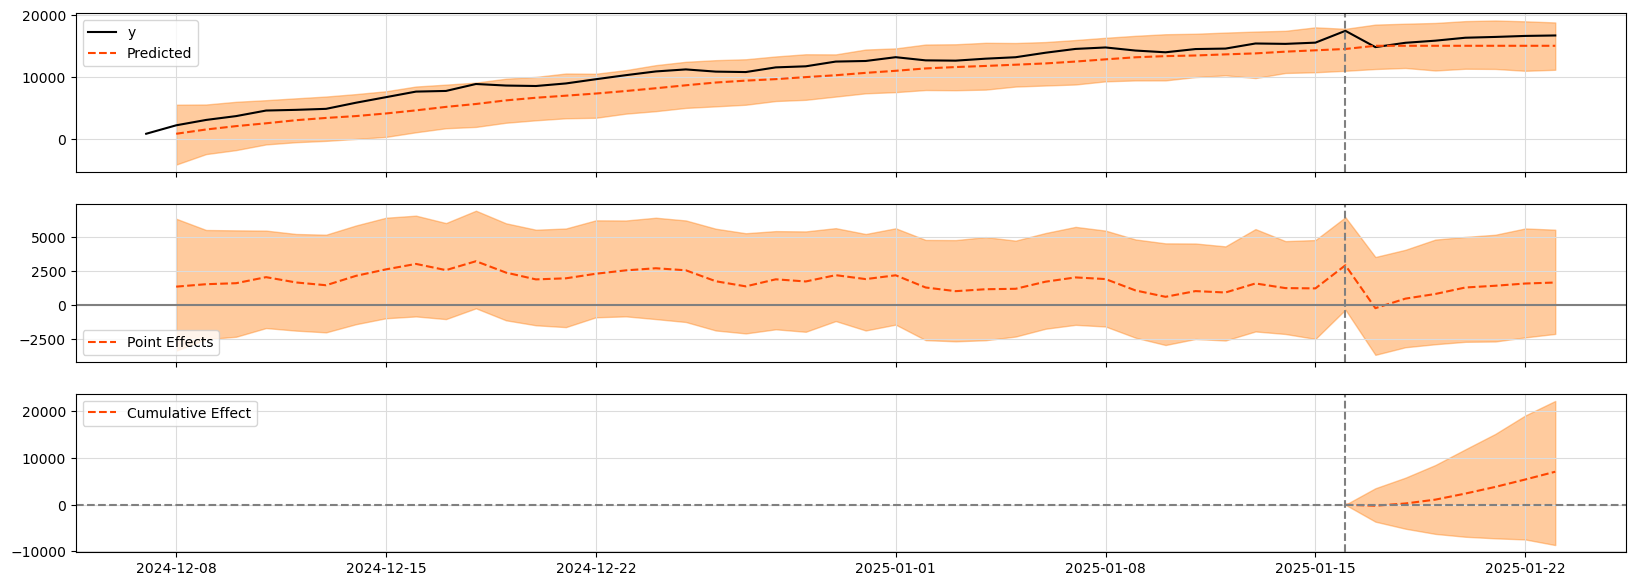

In [9]:
dau_df_impact.plot(figsize=(20, 7))

In [10]:
print(dau_df_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         15043.33 (1139.84) 105303.31 (7978.86)
95% CI                    [12756.67, 17224.75][89296.72, 120573.27]

Absolute effect (s.d.)    1009.38 (1139.84)  7065.69 (7978.86)
95% CI                    [-1172.04, 3296.04][-8204.27, 23072.28]

Relative effect (s.d.)    6.71% (7.58%)      6.71% (7.58%)
95% CI                    [-7.79%, 21.91%]   [-7.79%, 21.91%]

Posterior tail-area probability p: 0.18
Posterior prob. of a causal effect: 81.62%

For more details run the command: print(impact.summary('report'))


In [11]:
query_ctr = """
SELECT toDate(time) AS day,
sum(action='like') / sum(action='view') AS ctr
FROM simulator_20250120.feed_actions
GROUP BY toDate(time)
"""

# ctr_df = pandahouse.read_clickhouse(query=query_ctr, connection=connection)

In [12]:
ctr_df = pd.read_csv("ctr_df.csv", parse_dates=['day'])

In [13]:
ctr_df = pd.Series(data=ctr_df.ctr.tolist(), index=ctr_df.day)

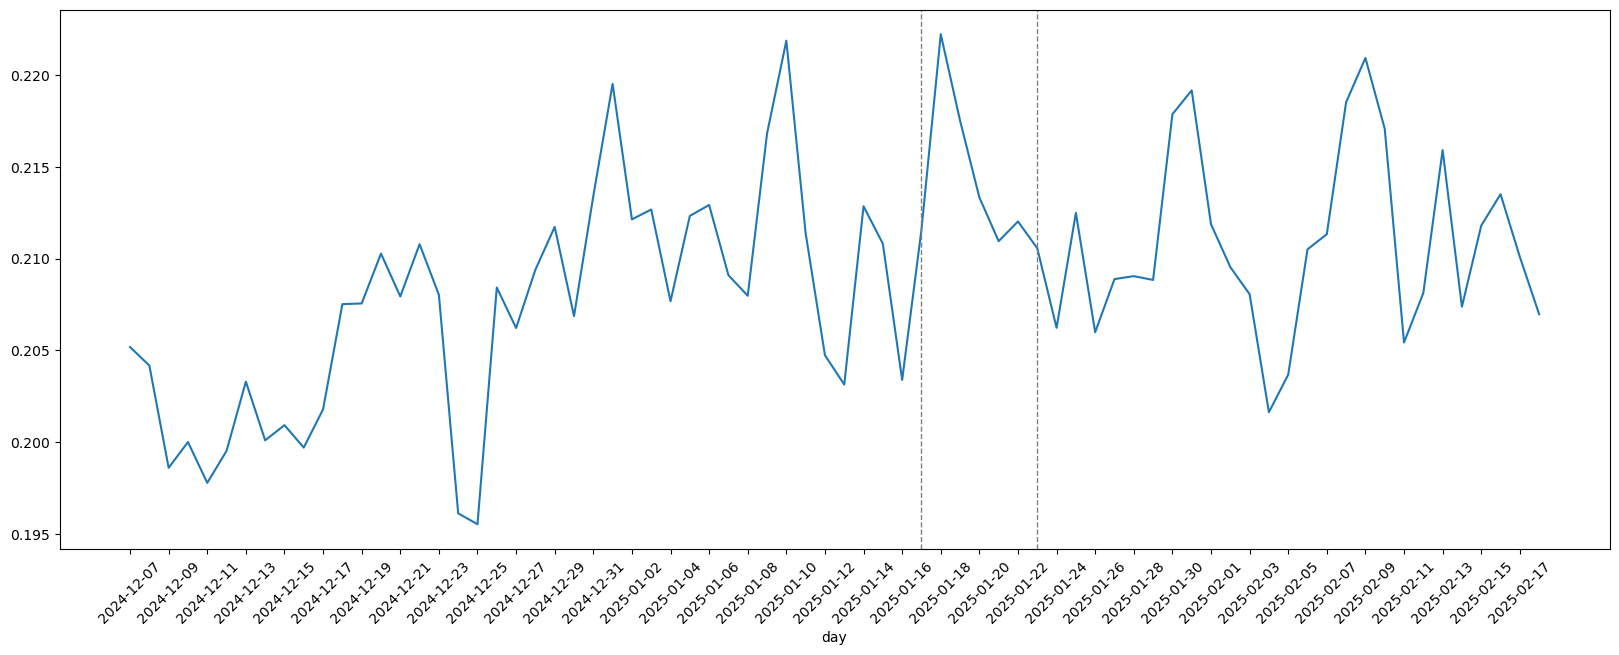

In [14]:
plt.figure(figsize=(20, 7))
data = ctr_df
sns.lineplot(data)
plt.xticks(ticks=data.index[::2], rotation=45)
plt.axvline(x=pd.Timestamp('2025-01-17'), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=pd.Timestamp('2025-01-23'), color='grey', linestyle='--', linewidth=1)

In [15]:
ctr_df_impact = CausalImpact(
    data=ctr_df,
    pre_period=['2024-12-07', '2025-01-16'],
    post_period=['2025-01-17', '2025-01-23']
)

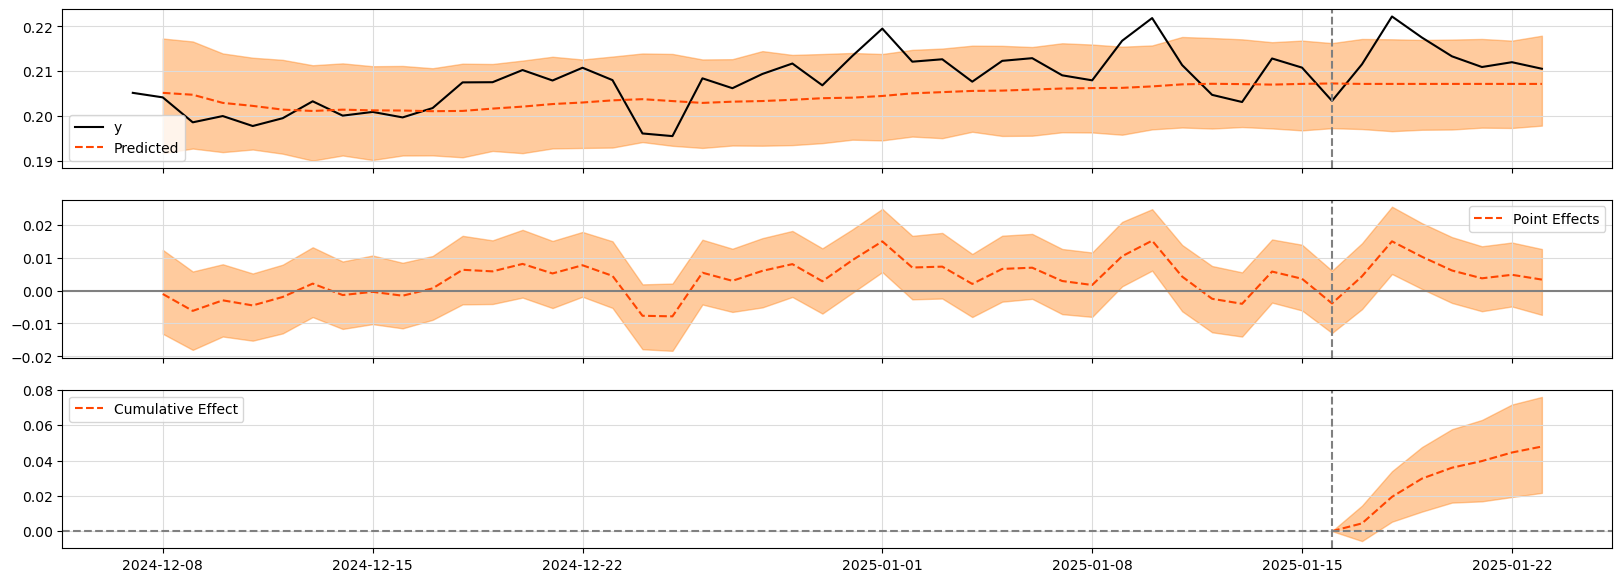

In [16]:
ctr_df_impact.plot(figsize=(20, 7))

In [17]:
print(ctr_df_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.45 (0.01)
95% CI                    [0.2, 0.21]        [1.42, 1.48]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.01)
95% CI                    [0.0, 0.01]        [0.02, 0.08]

Relative effect (s.d.)    3.3% (0.98%)       3.3% (0.98%)
95% CI                    [1.41%, 5.25%]     [1.41%, 5.25%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [18]:
query_views = """
SELECT toDate(time) AS day,
sum(action='view') AS views
FROM simulator_20250120.feed_actions
GROUP BY toDate(time)
"""

# views_df = pandahouse.read_clickhouse(query=query_views, connection=connection)

In [19]:
views_df = pd.read_csv("views_df.csv", parse_dates=['day'])

In [20]:
views_df = pd.Series(data=views_df.views.tolist(), index=views_df.day)

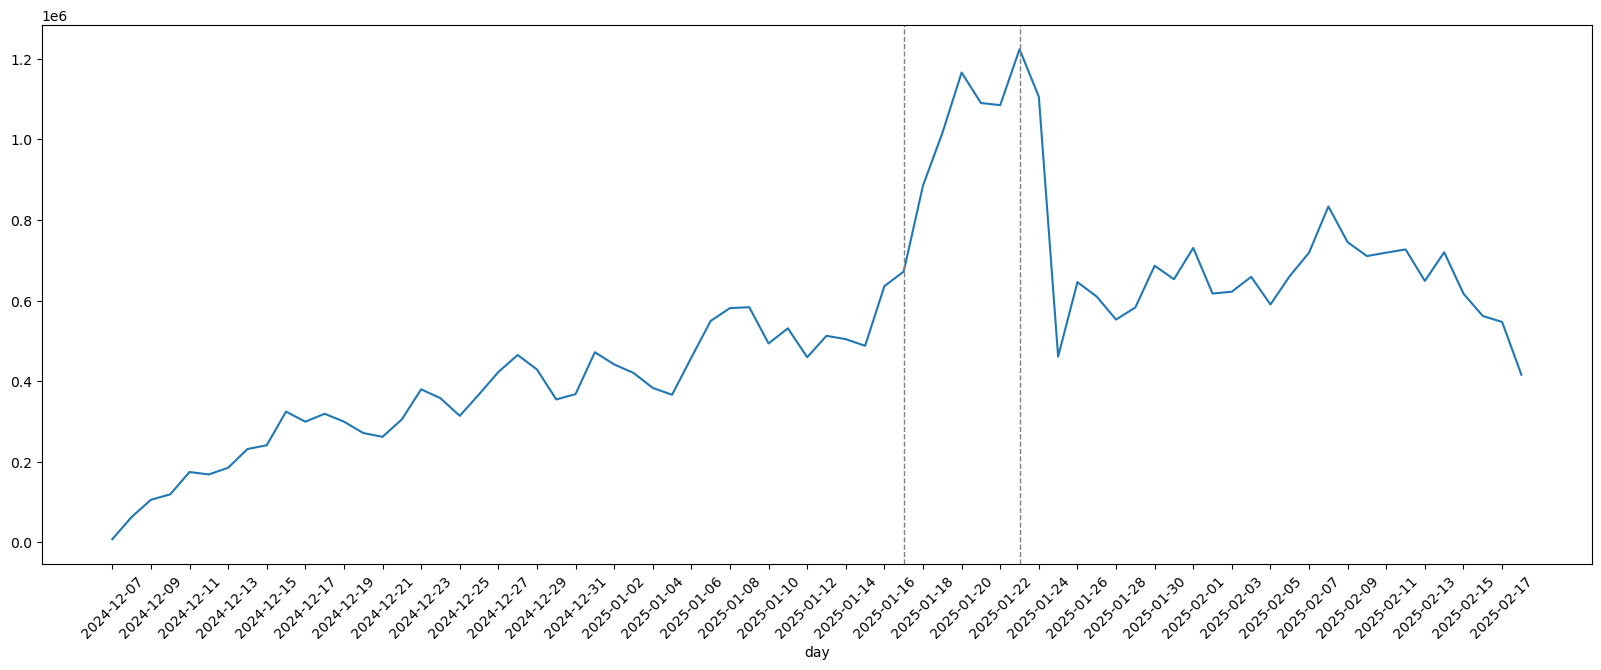

In [21]:
plt.figure(figsize=(20, 7))
data = views_df
sns.lineplot(data)
plt.xticks(ticks=data.index[::2], rotation=45)
plt.axvline(x=pd.Timestamp('2025-01-17'), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=pd.Timestamp('2025-01-23'), color='grey', linestyle='--', linewidth=1)

In [23]:
views_df_impact = CausalImpact(
    data=views_df,
    pre_period=['2024-12-07', '2025-01-16'],
    post_period=['2025-01-17', '2025-01-23']
)

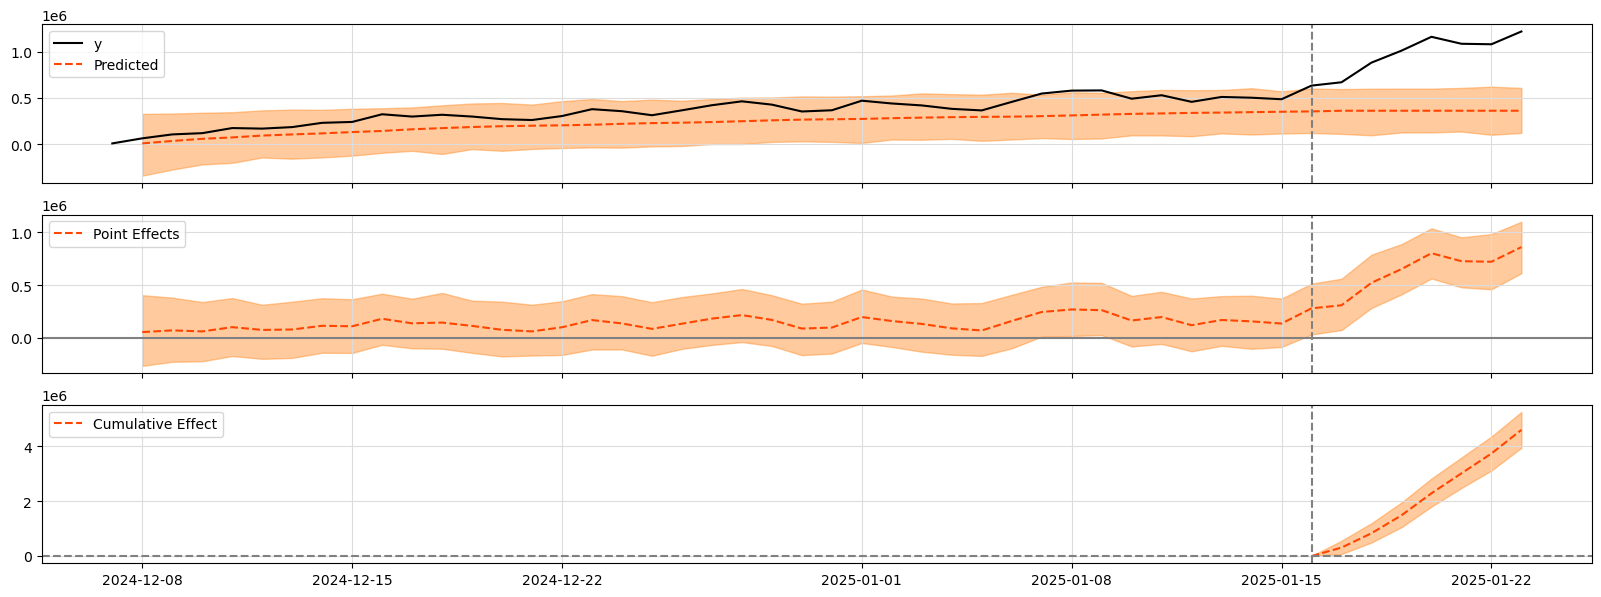

In [24]:
views_df_impact.plot(figsize=(20, 7))

In [25]:
print(views_df_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         362772.84 (53007.08)2539410.0 (371049.57)
95% CI                    [260680.61, 468464.6][1824764.3, 3279252.2]

Absolute effect (s.d.)    657174.5 (53007.08)4600221.0 (371049.57)
95% CI                    [551482.71, 759266.7][3860378.8, 5314866.7]

Relative effect (s.d.)    181.15% (14.61%)   181.15% (14.61%)
95% CI                    [152.02%, 209.3%]  [152.02%, 209.3%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
query_new_posts = """
WITH post_first_day AS (
    SELECT post_id,
          MIN(toDate(time)) AS day
    FROM simulator_20250120.feed_actions
    GROUP BY post_id
)

SELECT day,
      COUNT(1) as new_posts
FROM post_first_day
GROUP BY day
"""

# new_posts_df = pandahouse.read_clickhouse(query=query_new_posts, connection=connection)

In [26]:
new_posts_df = pd.read_csv("new_posts_df.csv", parse_dates=['day'])

In [27]:
new_posts_df = pd.Series(data=new_posts_df.new_posts.tolist(), index=new_posts_df.day)

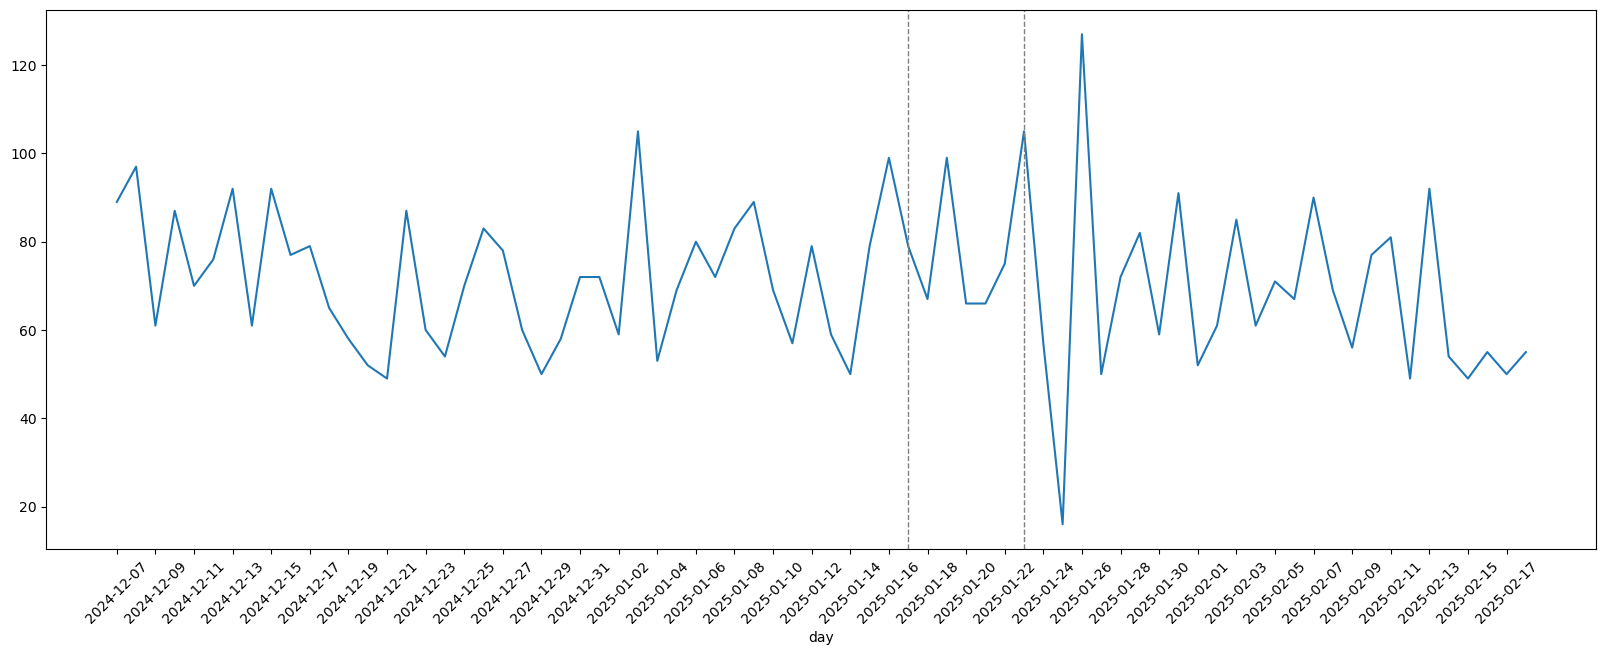

In [28]:
plt.figure(figsize=(20, 7))
data = new_posts_df
sns.lineplot(data)
plt.xticks(ticks=data.index[::2], rotation=45)
plt.axvline(x=pd.Timestamp('2025-01-17'), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=pd.Timestamp('2025-01-23'), color='grey', linestyle='--', linewidth=1)

In [29]:
new_posts_df_impact = CausalImpact(
    data=new_posts_df,
    pre_period=['2024-12-07', '2025-01-16'],
    post_period=['2025-01-17', '2025-01-23']
)

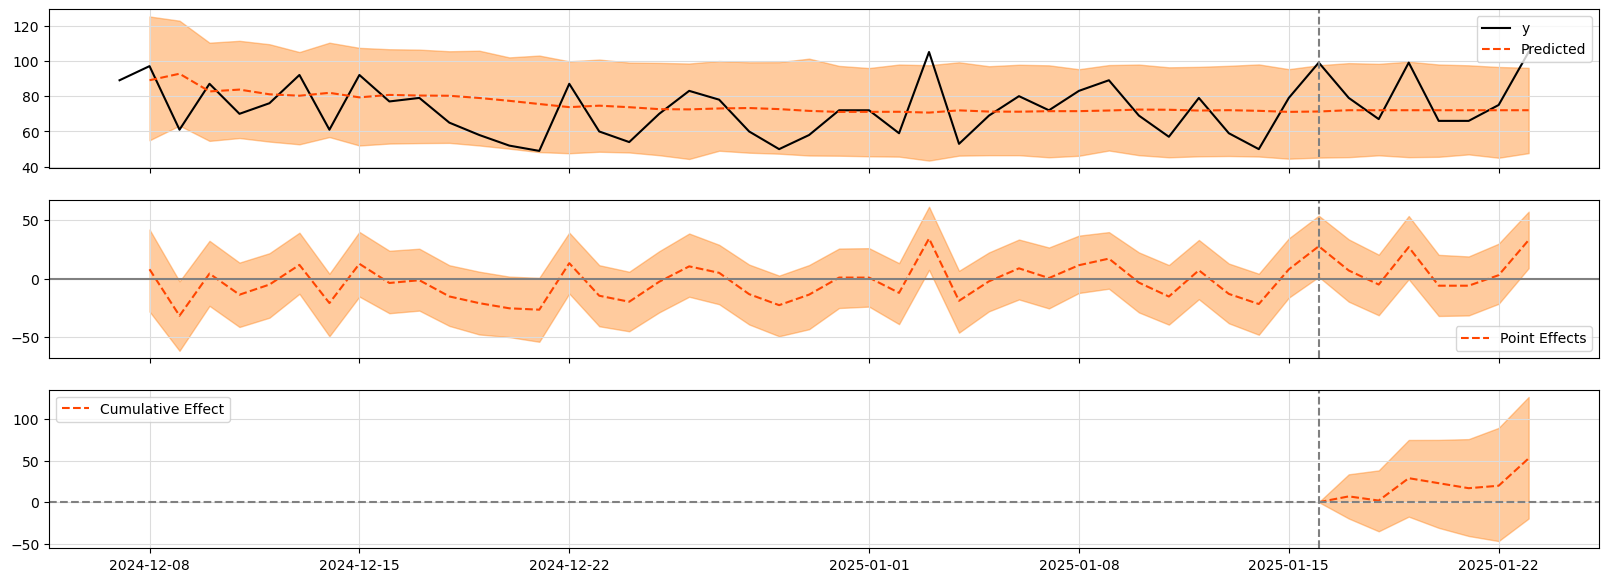

In [30]:
new_posts_df_impact.plot(figsize=(20, 7))

In [31]:
print(new_posts_df_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    79.57              557.0
Prediction (s.d.)         72.03 (5.26)       504.24 (36.85)
95% CI                    [61.27, 81.9]      [428.86, 573.33]

Absolute effect (s.d.)    7.54 (5.26)        52.76 (36.85)
95% CI                    [-2.33, 18.31]     [-16.33, 128.14]

Relative effect (s.d.)    10.46% (7.31%)     10.46% (7.31%)
95% CI                    [-3.24%, 25.41%]   [-3.24%, 25.41%]

Posterior tail-area probability p: 0.07
Posterior prob. of a causal effect: 93.11%

For more details run the command: print(impact.summary('report'))


In [32]:
query_posts = """
SELECT toDate(time) AS day,
       COUNT(DISTINCT post_id) as posts
FROM simulator_20250120.feed_actions
GROUP BY toDate(time)
"""

# posts_df = pandahouse.read_clickhouse(query=query_posts, connection=connection)

In [33]:
posts_df = pd.read_csv("posts_df.csv", parse_dates=['day'])

In [34]:
posts_df = pd.Series(data=posts_df.posts.tolist(), index=posts_df.day)

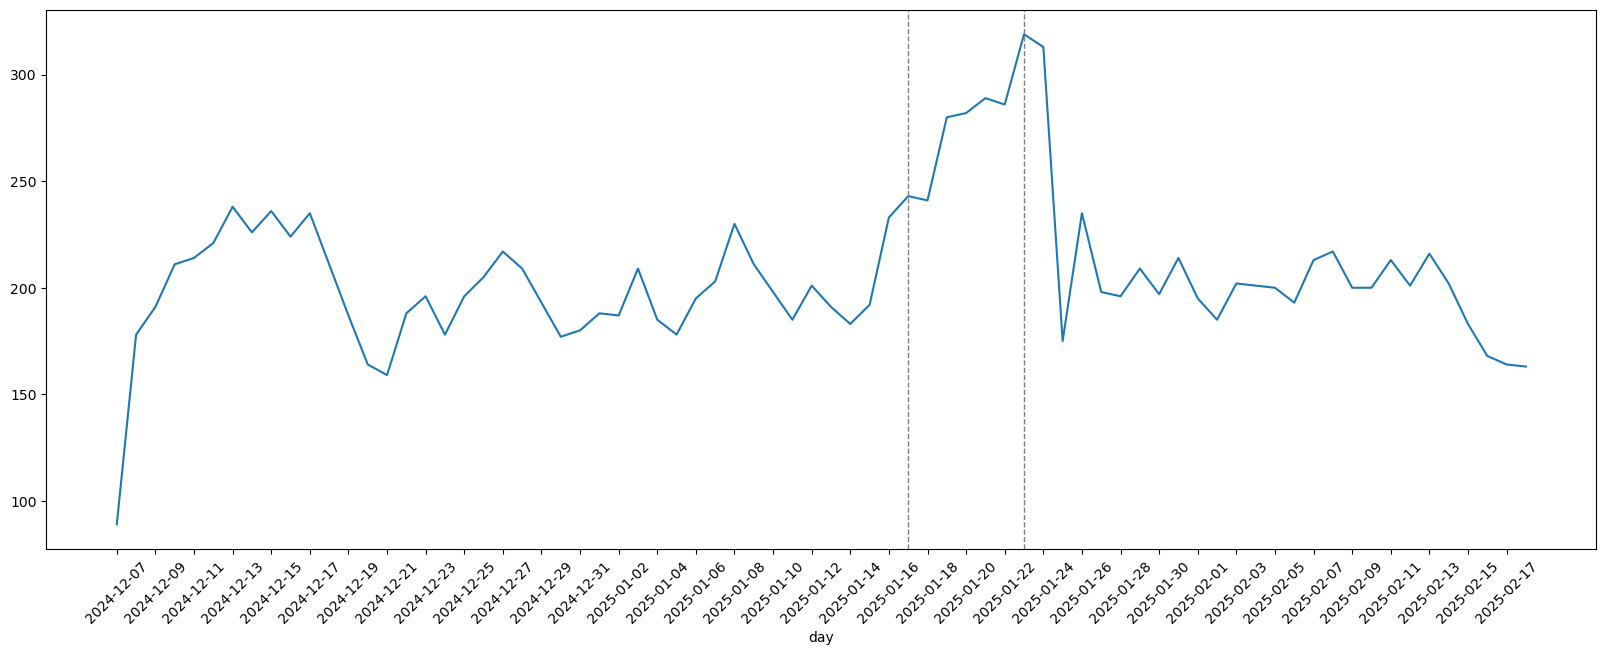

In [35]:
plt.figure(figsize=(20, 7))
data = posts_df
sns.lineplot(data)
plt.xticks(ticks=data.index[::2], rotation=45)
plt.axvline(x=pd.Timestamp('2025-01-17'), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=pd.Timestamp('2025-01-23'), color='grey', linestyle='--', linewidth=1)

In [36]:
posts_df_impact = CausalImpact(
    data=posts_df,
    pre_period=['2024-12-07', '2025-01-16'],
    post_period=['2025-01-17', '2025-01-23']
)

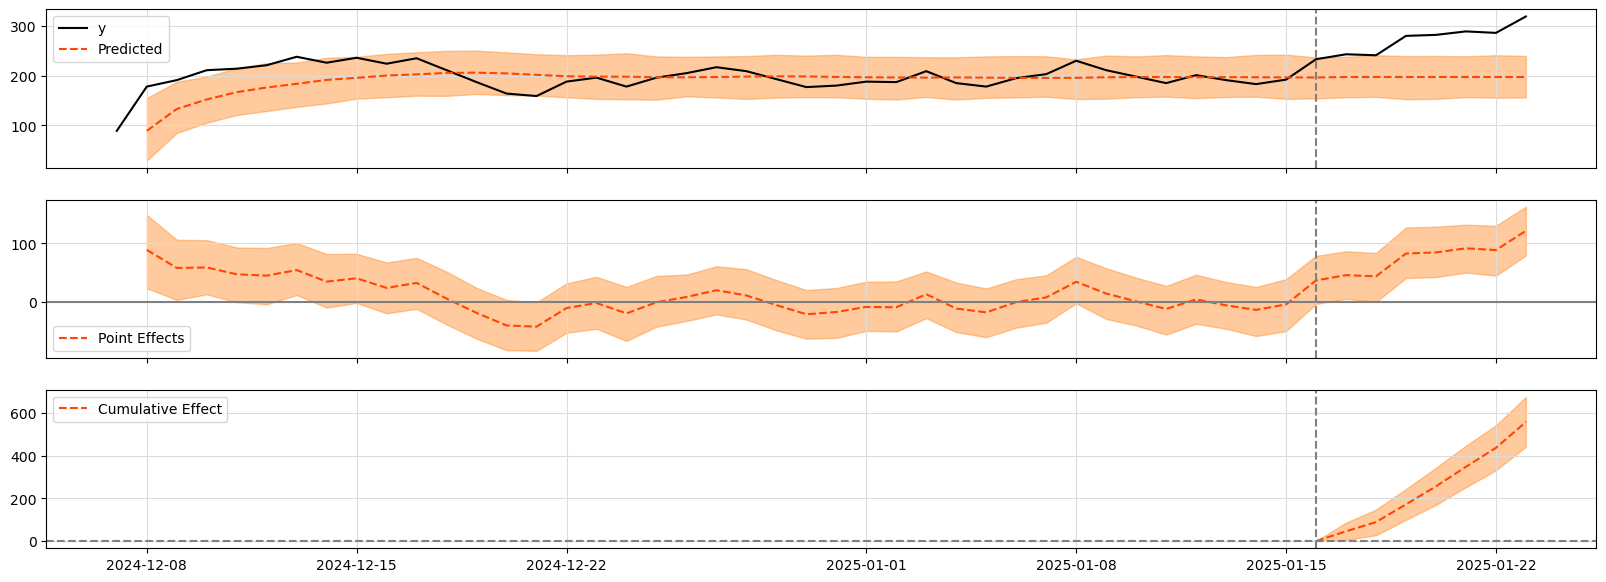

In [37]:
posts_df_impact.plot(figsize=(20, 7))

In [38]:
print(posts_df_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         197.33 (8.31)      1381.34 (58.16)
95% CI                    [180.79, 213.35]   [1265.51, 1493.48]

Absolute effect (s.d.)    79.81 (8.31)       558.66 (58.16)
95% CI                    [63.79, 96.36]     [446.52, 674.49]

Relative effect (s.d.)    40.44% (4.21%)     40.44% (4.21%)
95% CI                    [32.32%, 48.83%]   [32.32%, 48.83%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


### Exploration On The Effect After Flash Mob

#### DAU

In [41]:
query_dau = """
SELECT toDate(time) AS day,
COUNT(DISTINCT user_id) AS dau
FROM simulator_20250120.feed_actions
WHERE time > '2025-01-23'
GROUP BY toDate(time)
"""

# dau_df_after = pandahouse.read_clickhouse(query=query_dau, connection=connection)

In [42]:
dau_df_after = pd.read_csv("dau_df_after.csv", parse_dates=['day'])

In [43]:
dau_df_after = pd.Series(data=dau_df_after.dau.tolist(), index=dau_df_after.day)

dau_df_after.head()

day
2025-01-23    16705
2025-01-24    16195
2025-01-25    14073
2025-01-26    17510
2025-01-27    17703
dtype: int64

In [44]:
predicted_dau_df_impact = dau_df_impact.inferences.complete_preds_means.loc['2025-01-17':'2025-01-23']

In [45]:
z_dau_df = (dau_df - dau_df.mean()) / dau_df.std()

In [46]:
dau_df_all = pd.concat([dau_df.loc['2024-12-07':'2025-01-16'], predicted_dau_df_impact, dau_df_after]).sort_index()

In [47]:
dau_df_impact = CausalImpact(
    data=z_dau_df,
    pre_period=['2024-12-07', '2025-01-16'],
    post_period=['2025-01-17', '2025-01-23'],
    model=build_model(np.array(z_dau_df.loc[:'2025-01-16']))
)

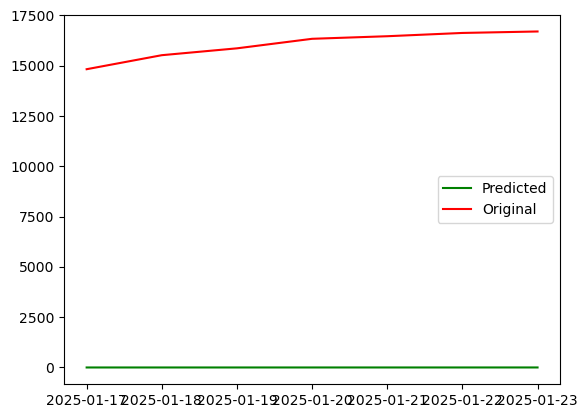

In [48]:
plt.plot(dau_df_impact.inferences['complete_preds_means'].loc['2025-01-17':], 'g', label='Predicted')
plt.plot(dau_df.loc['2025-01-17':'2025-01-23'], 'r', label='Original')
plt.legend()